# Class 8: Integration with Cursor
## Objective: Learn how to use Cursor to write code and debug code

This notebook provides practice for using the AI tools in Cursor.

**Instructions:** Work with one or more students at your table. Discuss the key concepts and the code logic with one another. 

## Section 1: Inline Magic

**Purpose:** Use for quick, local edits. For example, writing single functions, adding docstrings, or fixing a line of code without leaving the current cell. 

In [1]:
import numpy as np

## Generate some random numbers for magnitudes for the first exercise

# Define the desired mean and standard deviation
mean = 1
std_dev = 1
# Define the number of random numbers to generate
num_samples = 15

# Generate a set of random numbers from a normal distribution
# loc is the mean, scale is the standard deviation, size is the number of samples
fluxes = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
print(fluxes)

[ 1.11327494  0.30050999  2.196963    0.376902    0.74767891 -0.14985389
  1.79482041  1.68171828  1.57050367  2.69140314  0.81232427 -0.02463664
 -0.16989004  1.5506721   2.31793255]


**Exercise:** 
1. Click in the cell below.
2. Press `Cmd+K` (macOS) or `Ctrl+K` (Windows)
3. Type "Write a function called flux_to_mag that takes an array of fluxes and returns an array of magnitudess using the formula -2.5 * log10(flux). The function should use numpy arrays and handle negative fluxes by returning None for those array values."
4. Check the code try to understand if it is correct. If so, click on **Accept**.
5. Excute the code produced by the AI.
6. Execute the following code cell to test your new function.

In [2]:
def flux_to_mag(fluxes):
    """
    Convert an array of fluxes to magnitudes using the formula:
    mag = -2.5 * log10(flux)
    Negative or zero flux values are replaced with None.
    
    Parameters:
        fluxes (array-like): Array of flux values.
    
    Returns:
        list: List of magnitudes, with None for non-positive fluxes.
    """
    import numpy as np
    # Convert input to numpy array for easier handling
    fluxes = np.asarray(fluxes)
    # Initialize the result list
    mags = []
    for flux in fluxes:
        if flux > 0:
            mag = -2.5 * np.log10(flux)
            mags.append(mag)
        else:
            mags.append(None)
    return mags

In [3]:
# Test the new function
flux_to_mag(fluxes)

[np.float64(-0.1165060812583105),
 np.float64(1.3053527061869594),
 np.float64(-0.8545568569080007),
 np.float64(1.0594288943652688),
 np.float64(0.31571216672796937),
 None,
 np.float64(-0.6350525003711481),
 np.float64(-0.5643831104509124),
 np.float64(-0.49009738999483016),
 np.float64(-1.074946885468264),
 np.float64(0.22567642909475472),
 None,
 None,
 np.float64(-0.4762999312438531),
 np.float64(-0.9127519853066293)]

## Section 2: Chat Sidebar

**Purpose:** Think of the chat sidebar as a consultant, a more knowledgeable programming sitting next to you that you can ask questions. It is a good choice to explain why an error is happening or for brainstorming how to visualize data.

You can also use `@` to reference specific parts of your notebook. 

**Exercise:** The code below has multiple errors. Try the following:
1. Highlight the code block below
2. Press `Cmd+L` or `Ctrl+L` to open the Chat (or click the Add to Chat button if it appears)
3. Type: "This code is not working and the legend isn't showing up. Please explain what is wrong and provide a version that should work."
4. Read about the three fixes and try to understand them
5. Execure the corrected cell

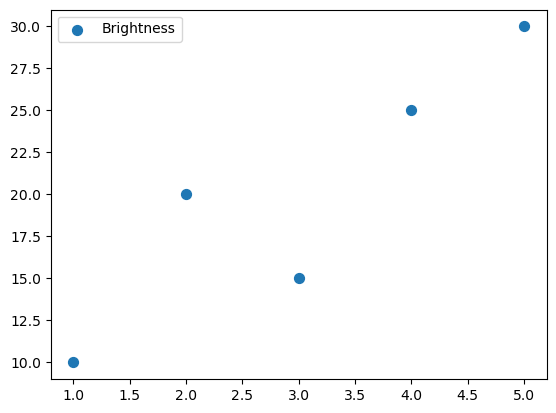

In [4]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

# Fixed version:
fig, ax = plt.subplots()  # Fixed: subplots() (plural) returns (fig, ax)
ax.scatter(x, y, s=50, label="Brightness")  # Fixed: added missing y parameter
plt.legend()  # Now the legend will show because the scatter plot has a label
plt.show()  # Fixed: added parentheses to actually call the function

## Section 3: Composer

**Purpose:** Think of the Composer as a professional software engineer. The Composure is for structureal changes that could include creating new files, creating modules, and moving code around. It can see the entire folder, not just a notebook cell or a single notebook.  

**Exercise:**
1. Press `Cmd+I` or `Ctrl+I` to open the Composer in the sidebar
2. Type: "Create a new file in my current folder called `astro_logic.py`. In that file, define a class called `Observation` with attributes for `target_name` and `filter_name`. Include a method that prints 'Starting observation of [target] in [filter]'
3. When the Composer shows you the file in the sidebar, review the content to make sure it looks reasonable, and then click **Apply** or **Keep**
4. Execute the cell below to test your new module

In [5]:
# After using Composer, try running this:
from astro_logic import Observation
obs = Observation("M31", "R-band")
obs.start_obs()

Starting observation of M31 in R-band


## Bonus: 

The full power of these tools is more obvious when we use them to produce really nice, technically challenging results in a short amount of time. 

This prompt produces a plot of the Planck's Law, which describes the spectral radiance (or surface brightness) from a perfect emitter (called a Blackbody) at some temperature as a function of wavelength. This is a good, first approximation to the amount of flux emitted by most stars as a function of wavelength. 

Try this prompt to produce a figure that shows Planck's Law for a relatively hot star (a 10,000 K  A0V like Vega), a star like the Sun (a 5,800 K G2V), and a cool star (a 3,500 K star like Betelgeuse). 

Prompt: *Write a function for Planck's Law that calculates Intensity as a function of Wavelength and Temperature. Use numpy and scientific constants. Then, plot the curves for 3500K (e.g. Betelgeuse), 5800K (Sun), and 10000K (e.g. Vega) for wavelengths from 100nm to 2000nm. Use the usual astronomy convention that hot stars are blue, so use a blue line for the hottest star, and that cool stars are red. Use mks units throughout. Also, mark the visible wavelength range with a rainbow of vertical stripes of different colors, at least the ROYGBIV colors. Use a log-scale y-axis and make the plot look professional.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

def planck_law(wavelength, temperature):
    """
    Calculate the spectral radiance (intensity) using Planck's Law.
    
    Parameters:
        wavelength (array): Wavelength in meters (MKS units)
        temperature (float): Temperature in Kelvin
    
    Returns:
        array: Spectral radiance in W/(m²·sr·m) (MKS units)
    """
    h = constants.h  # Planck's constant (J·s)
    c = constants.c  # Speed of light (m/s)
    k = constants.k  # Boltzmann constant (J/K)
    
    # Planck's Law: B(λ, T) = (2πhc²/λ⁵) / (e^(hc/(λkT)) - 1)
    numerator = 2 * np.pi * h * c**2
    denominator = wavelength**5 * (np.exp(h * c / (wavelength * k * temperature)) - 1)
    
    intensity = numerator / denominator
    return intensity

# Define wavelength range: 100nm to 2000nm (convert to meters for MKS)
wavelength_nm = np.linspace(100, 2000, 10000)  # nm
wavelength_m = wavelength_nm * 1e-9  # Convert to meters

# Define temperatures and corresponding colors
temperatures = [10000, 5800, 3500]  # K (hot to cool)
colors = ['blue', 'orange', 'red']  # Hot stars are blue, cool stars are red
labels = ['Vega (10,000 K)', 'Sun (5,800 K)', 'Betelgeuse (3,500 K)']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Planck's Law for each temperature
for temp, color, label in zip(temperatures, colors, labels):
    intensity = planck_law(wavelength_m, temp)
    ax.plot(wavelength_nm, intensity, color=color, linewidth=2, label=label)

# Add rainbow stripes for visible spectrum (380-750 nm)
visible_min = 380  # nm
visible_max = 750  # nm

# ROYGBIV colors (Red, Orange, Yellow, Green, Blue, Indigo, Violet)
# Note: Indigo is often omitted, so we'll use 6 colors
rainbow_colors = ['violet', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red']
n_colors = len(rainbow_colors)
visible_range = visible_max - visible_min
color_width = visible_range / n_colors

# Get current y-axis limits for the stripes
ylim = ax.get_ylim()
y_bottom = ylim[0]
y_top = ylim[1]

# Draw vertical stripes
for i, color in enumerate(rainbow_colors):
    x_left = visible_min + i * color_width
    x_right = visible_min + (i + 1) * color_width
    ax.axvspan(x_left, x_right, alpha=0.2, color=color, zorder=0)

# Set log scale for y-axis
ax.set_yscale('log')

# Labels and title
ax.set_xlabel('Wavelength (nm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Spectral Radiance (W/(m²·sr·m))', fontsize=14, fontweight='bold')
ax.set_title("Planck's Law: Blackbody Radiation Spectra", fontsize=16, fontweight='bold')

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Add legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

# Add text annotation for visible spectrum (get ylim after all plots)
ylim = ax.get_ylim()
ax.text((visible_min + visible_max) / 2, ylim[1] * 0.1, 
        'Visible Spectrum', ha='center', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Set x-axis limits to show the full range
ax.set_xlim(100, 2000)

plt.tight_layout()
plt.show()